In [9]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
def show_pdf(pdf, xmin, xmax, grid_size, distr_name, **kwargs):
    X = np.linspace(xmin, xmax, grid_size)
    Y = pdf(X, **kwargs)
    ymax = max(Y) + 0.1

    plt.figure(figsize=(6, 3))
    plt.plot(X, Y, lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=10)
    plt.ylabel('Плотность', fontsize=10)
    plt.xlim((xmin, xmax))
    plt.ylim((-0.05, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=14)
    plt.show()

#Равномерное непрерывное распределение

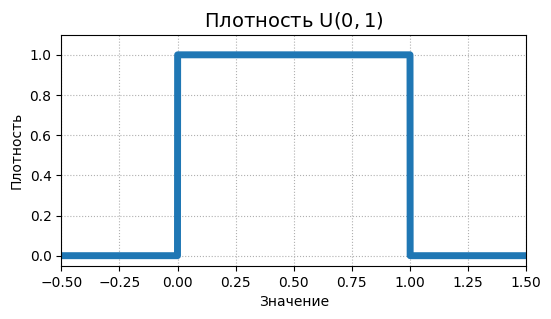

In [5]:
show_pdf(sts.uniform.pdf, -0.5, 1.5, 10000, r'U$(0,1)$',loc=0, scale=1)

##Исследование зависимости плотности от параметров равномерного распределения

In [8]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.uniform.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100,
                                description='$gridsize$'),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1, value=1,
                                description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1, value=10,
                                description='$x_{max}=$'),
    loc=widgets.FloatSlider(min=1, max=15, step=0.01, value=3,
                                description='$a=$'),
    scale=widgets.FloatSlider(min=0.5, max=10, step=0.01, value=1,
                                description='$b - a=$'),
    distr_name=r'$U$({loc:.2f}, {loc:.2f} + {scale:.2f})'
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))

ip.update()

##Сравнение плотности равномерного непрерывного распределения и гистограммы.

In [9]:
def plot_uniform(a=0, b=1, n_points=1000):
    plt.figure(figsize=(6, 3))
    sample = sts.uniform.rvs(loc=a, scale=b - a, size=n_points)
    plt.hist(sample, bins=30, density=True, alpha=0.6,
             label='Гистограмма выборки')
    grid = np.linspace(a - (b - a) / 6, b + (b - a) / 6, n_points)
    plt.plot(grid, sts.uniform.pdf(grid, a, b - a), color='red', lw=3,
             label='Плотность случайной величины')
    plt.title(r'Случайная величина $X \sim \mathcal{R}$(a, b)', fontsize=14)
    plt.legend(fontsize=10, loc=8)
    plt.grid(ls=':')
    plt.show()

    print(f'Математическое ожидание: {round(sample.mean(), 3)}, '
          f'а по формуле: {round((a + b) / 2, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, '
          f'а по формуле: {round((b - a) ** 2 / 12, 3)}')

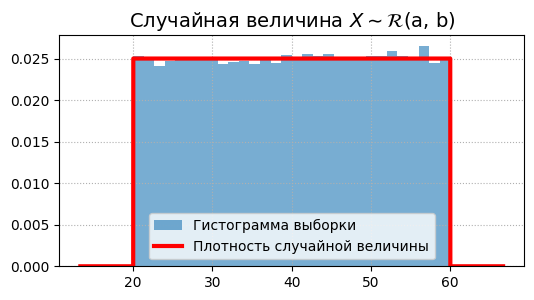

Математическое ожидание: 40.091, а по формуле: 40.0
Дисперсия: 133.348, а по формуле: 133.333


In [10]:
plot_uniform(20, 60, 100_000)

#Экспоненциальное распределение

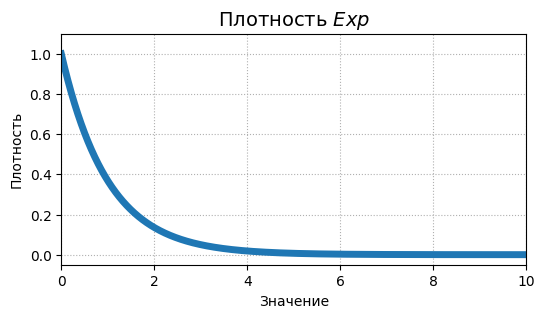

In [11]:
show_pdf(sts.expon.pdf, 0, 10, 10000, r'$Exp$', scale=1)

##Исследование зависимости плотности от параметров экспоненциального распределения

In [13]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.expon.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100,
                                description='$gridsize$'),
    xmin=widgets.FloatSlider(min=0, max=20, step=0.1, value=0,
                                description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1, value=10,
                                description='$x_{max}=$'),
    scale=widgets.FloatSlider(min=0, max=5, step=0.1, value=1,
                                description='$1/lambda=$'),
    distr_name=r'Exp({scale:.2f})'
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))

ip.update()

##Сравнение плотности экспоненциального распределения и гистограммы.

In [14]:
def plot_exp(lmbd=1, n_points=100_000):
    plt.figure(figsize=(6, 3))
    sample = sts.expon.rvs(scale=1 / lmbd, size=n_points)
    plt.hist(sample, bins=30, density=True, alpha=0.6,
             label='Гистограмма выборки')
    grid = np.linspace(0, 10, n_points)
    plt.plot(grid, sts.expon.pdf(grid, scale=1 / lmbd), color='red', lw=3,
             label='Плотность случайной величины')
    plt.title(r'Случайная величина $X \sim \mathcal{Exp}$($\lambda$)',
              fontsize=14)
    plt.legend(fontsize=10, loc=0)
    plt.grid(ls=':')
    plt.show()

    print(f'Математическое ожидание: {round(sample.mean(), 3)}, '
          f'а по формуле: {round(1 / lmbd, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, '
          f'а по формуле: {round(1 / lmbd ** 2, 3)}')

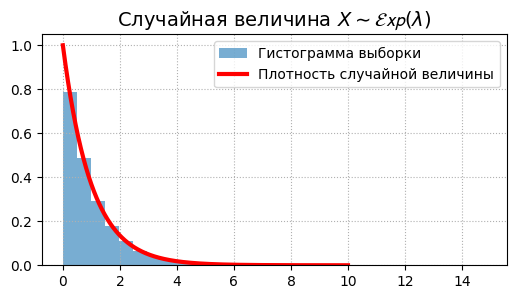

Математическое ожидание: 0.998, а по формуле: 1.0
Дисперсия: 0.99, а по формуле: 1.0


In [15]:
plot_exp()

#Нормальное распределение

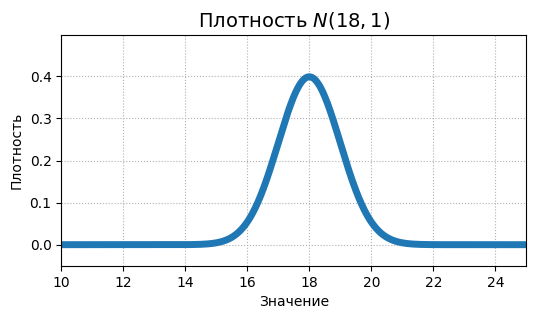

In [17]:
show_pdf(sts.norm.pdf, 10, 25, 10000, r'$N(18,1)$', loc=18, scale=1)

##Исследование зависимости плотности от параметров нормального распределения

In [16]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.norm.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100,
                                description='$gridsize$'),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1, value=0,
                                description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=5, max=25, step=0.1, value=15,
                                description='$x_{max}=$'),
    loc=widgets.FloatSlider(min=-1, max=25, step=0.01, value=10,
                                description='$a=$'),
    scale=widgets.FloatSlider(min=0.01, max=10, step=0.01, value=1,
                                description='$sigma=$'),
    distr_name=r'N({loc:.2f},{scale:.2f})'
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))

ip.update()

##Сравнение плотности нормального распределения и гистограммы.

In [18]:
def plot_norm(a=0, sigma=1, n_points=10_000_000):
    plt.figure(figsize=(6, 3))
    sample = sts.norm.rvs(loc=a, scale=sigma, size=n_points)
    plt.hist(sample, bins=30, density=True, alpha=0.6,
             label='Гистограмма выборки')
    grid = np.linspace(a - 3 * sigma, a + 3 * sigma, n_points)
    plt.plot(grid, sts.norm.pdf(grid, a, sigma), color='red', lw=3,
             label='Плотность случайной величины')
    plt.title(r'Нормальная величина $X \sim \mathcal{N}$', fontsize=14)
    plt.legend(fontsize=8, loc=8)
    plt.grid(ls=':')
    plt.show()

    print(f'Математическое ожидание: {round(sample.mean(), 3)}, '
          f'а по формуле: {round(a, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, '
          f'а по формуле: {round(sigma ** 2, 3)}')

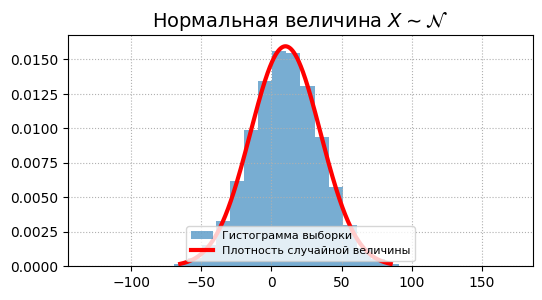

Математическое ожидание: 9.996, а по формуле: 10
Дисперсия: 625.107, а по формуле: 625


In [19]:
plot_norm(10, 25)

#Распределение Стьюдента
Распределение Стьюдента (t-распределение) — это семейство непрерывных распределений в статистике, которое используется для оценки параметров нормально распределенных данных, особенно при малых выборках, когда дисперсия неизвестна, и является ключевым для проверки гипотез (t-критерий Стьюдента) и построения доверительных интервалов. Оно похоже на нормальное распределение, но имеет «тяжелые хвосты», что делает его более устойчивым к выбросам; при увеличении числа степеней свободы (параметр, связанный с размером выборки) t-распределение приближается к нормальному.

##Формула плотности
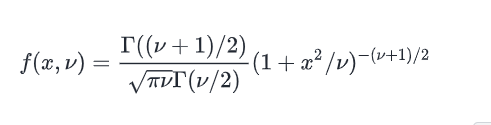

Где Г - гамма функция Эйлера

v - параметр степеней свободы(df в реализации)

Математическое ожидание M(t) = 0 , если v > 1

Дисперсия $D(t) = \frac{v}{v-2}$ , если v > 2

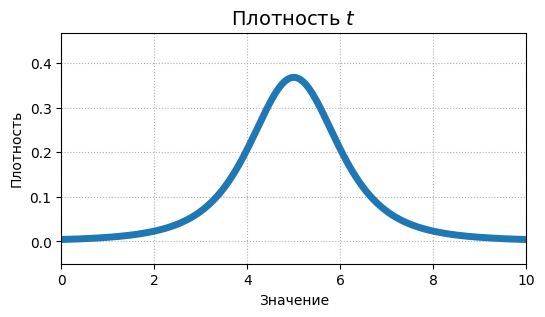

In [27]:
show_pdf(sts.t.pdf, 0, 10, 10000, r'$t$', df=3, loc = 5, scale=1)

##Исследование зависимости плотности от параметров нормального распределения

In [29]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.t.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100,
                                description='$gridsize$'),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1, value=0,
                                description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=5, max=25, step=0.1, value=15,
                                description='$x_{max}=$'),
    df = widgets.IntSlider(min=0, max=30, step=1, value=1,
                                description='$df$'),
    loc=widgets.FloatSlider(min=-1, max=25, step=0.01, value=10,
                                description='$loc=$'),
    scale=widgets.FloatSlider(min=0.01, max=10, step=0.01, value=1,
                                description='$scale=$'),
    distr_name=r't'
)

display(widgets.VBox(ip.children[:2] + ip.children[4:]))

ip.update()

##Сравнение плотности нормального распределения и гистограммы.

In [42]:
def plot_norm(df = 3, loc=0, scale=1, n_points=10_000):
    plt.figure(figsize=(6, 3))
    sample = sts.t.rvs(loc=loc, scale=scale, df=df, size=n_points)
    plt.hist(sample, bins=100, density=True, alpha=0.6,
             label='Гистограмма выборки')
    grid = np.linspace(-5, 5, n_points)
    plt.plot(grid, sts.t.pdf(grid,loc=loc, scale=scale, df=df), color='red', lw=3,
             label='Плотность случайной величины')
    plt.title(r'Распределение Стьюдента', fontsize=14)
    # plt.legend(fontsize=8, loc=8)
    plt.grid(ls=':')
    plt.show()

    print(f'Математическое ожидание: {round(sample.mean(), 3)}, '
          f'а по формуле: {0}')
    print(f'Дисперсия: {round(sample.var(), 3)}, '
          f'а по формуле: {round(df/(df-2))}')

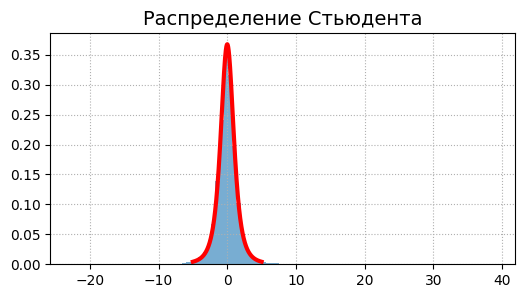

Математическое ожидание: -0.023, а по формуле: 0
Дисперсия: 3.098, а по формуле: 3


In [43]:
plot_norm()